In [146]:
import random
from matplotlib import pyplot as plt 

# converting the input matrix into a 2d list
with open("TSP Matrix.txt") as input:
    distances = [[int(d) for d in line.split(",")] for line in input.read().splitlines()]

# function to calculate the length of the path
def calculate_distance(path):
    l = len(path)
    total = 0
    for i in range(l):
        total += distances[path[i]][path[(i+1)%l]]
    return total

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(matrix, start):
    path = [start]
    while len(path) < len(matrix):
        current = path[-1]
        indices = [ind for ind in range(len(matrix[current])) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if matrix[current][ind] < smallest:
                smallest = matrix[current][ind]
                next = ind
        path.append(next)
    return path

# function generating a random initial path
def create_initial_random(matrix):
    indices = list(range(len(matrix)))
    random.shuffle(indices)
    return indices


initial_greedy = create_initial_greedy(distances, 0)
initial_random = create_initial_random(distances)

print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(initial_greedy))

print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(initial_random))

Initial Greedy Path: [0, 26, 18, 8, 16, 13, 32, 9, 3, 21, 39, 6, 10, 2, 23, 27, 11, 17, 38, 7, 14, 12, 25, 5, 1, 22, 35, 48, 33, 28, 37, 4, 36, 45, 31, 29, 19, 44, 42, 41, 15, 24, 30, 40, 46, 49, 43, 20, 47, 34]
Initial Greedy Path distance: 82
Initial Random Path: [44, 42, 32, 3, 33, 18, 41, 34, 8, 26, 7, 48, 19, 1, 14, 20, 15, 27, 49, 13, 28, 11, 47, 21, 10, 30, 43, 2, 22, 39, 38, 37, 45, 6, 46, 36, 5, 31, 23, 25, 0, 35, 16, 4, 24, 17, 29, 12, 40, 9]
Initial Random Path distance: 284


Initial distance =  284
Final distance =  89


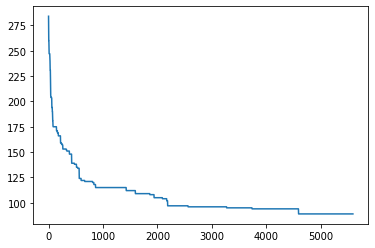

Initial distance =  82
Final distance =  73


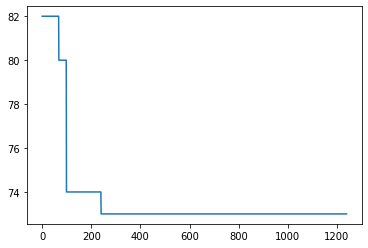

In [176]:
def hill_climbing(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p
    
def run(path):
    p = list(path)
    print("Initial distance = ", calculate_distance(p))
    no_improvement_for = 0
    ds = []
    while no_improvement_for < 1000:
        current_distance = calculate_distance(p)
        ds.append(current_distance)
        new_p = hill_climbing(p)
        if calculate_distance(new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final distance = ", ds[-1])
    plt.plot(ds)
    plt.show()

run(initial_random)
run(initial_greedy)